In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

In [2]:
FILE_PATH = "C:/Users/rmappin/OneDrive - University College London/PhD/PhD_Prog/010_CNN_SISR/reports/"
report_list = os.listdir(FILE_PATH)
NUM_EPOCHS = 100
ncs = ['nc4', 'nc8', 'nc16', 'nc32']
ep = f"ep{NUM_EPOCHS}"
etas = ['eta0.001']
cvs = ['cv0', 'cv1', 'cv2', 'cv3', 'cv4']


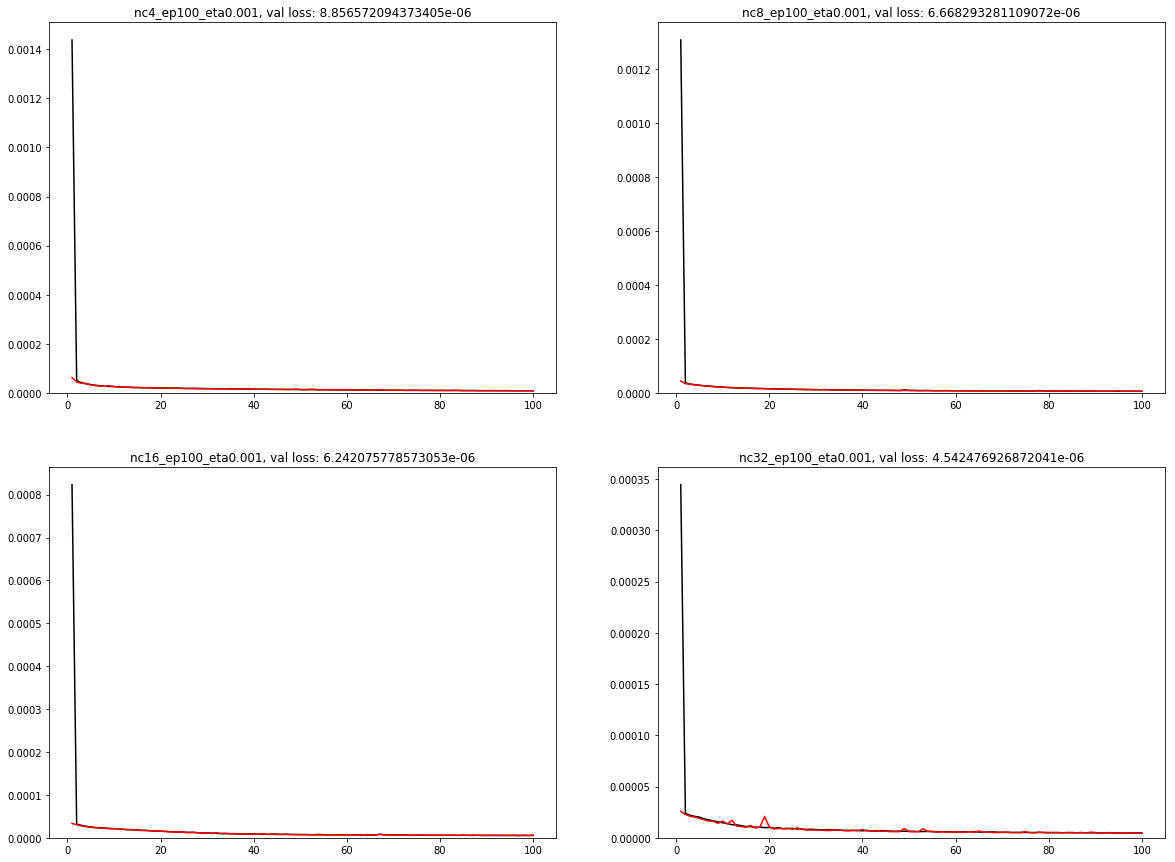

In [12]:
count = 0
fig = plt.figure(figsize=(20, 15))

for eta in etas:
    for nc in ncs:
        train_loss = np.zeros((len(cvs), NUM_EPOCHS))
        val_loss = np.zeros((len(cvs), NUM_EPOCHS))

        for i, cv in enumerate(cvs):
            report_name = f"{nc}_{ep}_{eta}_{cv}.txt"
            
            with open(f"{FILE_PATH}{report_name}", 'r') as in_file:
                for j in range(NUM_EPOCHS):
                    line = in_file.readline()
                    train_loss[i, j] = float(line.split(',')[1].split(' ')[3])
                    val_loss[i, j] = float(line.split(',')[2].split(' ')[3])
                    
        mean_val_loss = np.mean(val_loss[:, -1])
        plt.subplot(2, 2, count + 1)
        plt.plot(np.linspace(1, NUM_EPOCHS, NUM_EPOCHS), np.mean(train_loss, axis=0), 'k')
        plt.plot(np.linspace(1, NUM_EPOCHS, NUM_EPOCHS), np.mean(val_loss, axis=0), 'r')
        plt.title(f"{report_name[:-8]}, val loss: {mean_val_loss}")
        plt.ylim(bottom=0)
        count += 1

plt.show()
        